### GW tutorial 2: Detector noise and GW150914

Author: Melissa Lopez

Student: Sophia Berinski

ID: 6359723

Email: m.lopez@uu.nl

Note that we are importing some packages to be able to read the data.

In [ ]:
!pip install pycbc

In [ ]:
%matplotlib inline
from pycbc.catalog import Merger
import pycbc.psd
import pylab
import matplotlib.pyplot as plt
import numpy as np

In the previous part we have seen the detector response to gravitational waves (GW). Currently, we have three ground-based detectors: LIGO Hanford (H1), LIGO Livingston (L1) and Virgo (V1). But what does the data actually look like?

To answer this question we are going to take a look at the first detection: **GW150914**. Let's load the data from L1

In [ ]:
m = Merger('GW150914')
ifo = 'L1' #data from LIGO used
data = m.strain(ifo)

**Exercise 1:** We can see that this object is a PyCBC timeseries, and as such you can check what their atributes are (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#module-pycbc.types.timeseries)). Let's check some of them.

- How much is the duration of the time series?

- How much is its sampling rate?

- How many data points does it have?

- How much is $\Delta_{f}$ and $\Delta_{t}$? Can you find a relation between these and the number of data points?

_Hint:_ $\Delta_{f} = 1/duration$ and  $\Delta_{t} = 1/sample\_rate$

In [ ]:
# duration, sampling rate, number of data points
print(f"Duration of the time series: {data.duration} s")
print(f"Sampling rate: {data.sample_rate} Hz")
print(f"Number of data points: {len(data)}")

# delta f and t
delta_f = 1/data.duration
delta_t = 1/data.sample_rate
print(f"Delta f (Δf): {delta_f}")
print(f"Delta t (Δt): {delta_t}")

# to find the relation, I did this
print(f"Relation: delta_f * duration = {delta_f * data.duration}")
print(f"Relation: delta_t * sample_rate = {delta_t * data.sample_rate}")
print(f"Number of data points vs. duration and sampling rate: {data.duration * data.sample_rate}")


Duration of the time series: 32.0 s
Sampling rate: 4096.0 Hz
Number of data points: 131072
Delta f (Δf): 0.03125
Delta t (Δt): 0.000244140625
Relation check: delta_f * duration = 1.0
Relation check: delta_t * sample_rate = 1.0
Number of data points vs. duration and sampling rate: 131072.0


The previous magnitudes are key parameters of the timeseries. Now, let's plot the actual data to see what it looks like.

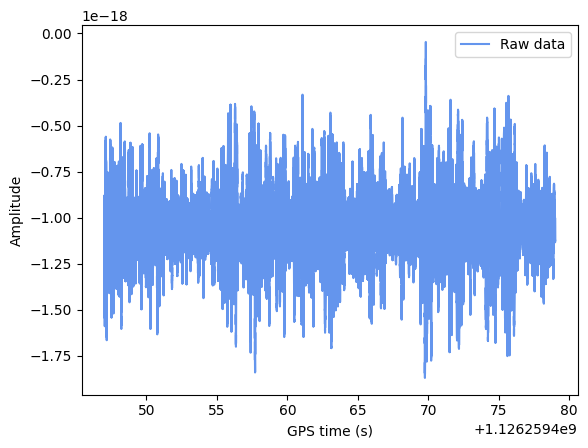

In [ ]:
plt.plot(data.sample_times, data, label='Raw data', color='cornflowerblue')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude')
plt.legend()

In GW we use the GPS time to determine at what time the GW signals reached Earth. You can see that the amplitude of this data is super small, $\mathcal{O}(10^{-18})$! GW interferometers are able to detect a change in distance of ~1/10,000th the size of a proton.

But, where is GW190514? We cannot see it (yet) as there are many different contributions from the detector. The detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design.

**Exercise 2**: Estimate the PSD of the data using `filter_psd` (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.filter_psd)) and plot it. Limit your plot according to the minimum frequency (say, 1 Hz) and  the Nyquist frequency.

_Hint_: Note that the PSD is a frequency series.

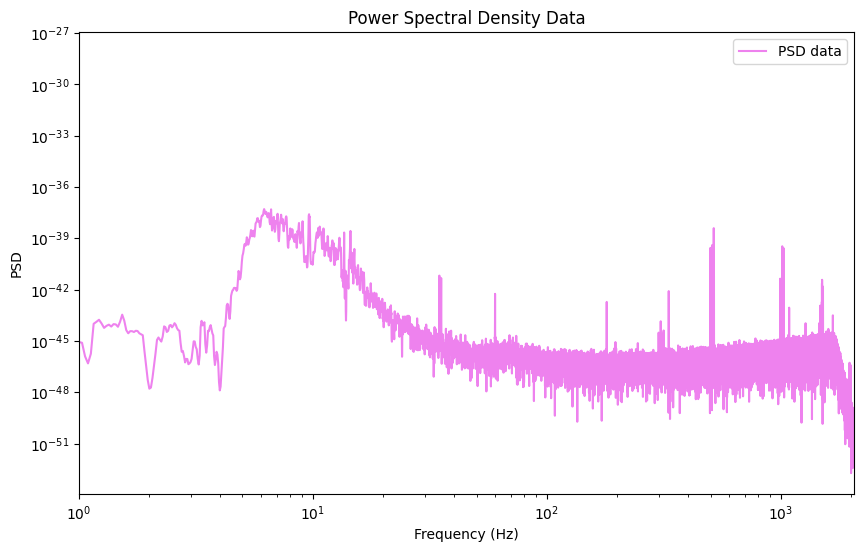

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# here I estimate the PSD of the data
psd = data.filter_psd(data.duration, delta_f, 1)

# the minimum and Nyquist frequencies (sample/2, from https://en.wikipedia.org/wiki/Nyquist_frequency)
fmin = 1.0
fnyq = data.sample_rate / 2

#frequency array
frequencies = np.arange(fmin, fnyq, delta_f)

# plot
plt.figure(figsize=(10, 6))
plt.loglog(psd.sample_frequencies, psd, label='PSD data', color='violet')
plt.xlim(fmin, fnyq)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Power Spectral Density Data')
plt.legend()
plt.show()


The PSD shows us what are the different contributions of the detector noise.
While we computed the PSD from 1 Hz, you can see that there is a weird behaviour for frequencies < 5 Hz. This is because the detector is not calibrated at these frequencies, so our analysis needs to start at higher frequencies. For current ground based detectors, we usually start at 10 Hz or higher, depending on the source.

GW signals are tiny, so with this much noise we won't be able to see GW150914. To "flatten" all frequency contributions we whiten the data.

**Exercise 3:** We can whiten the data with [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.whiten) function. Use `segment_duration = 4` and `max_filter_duration=4`.

- Plot the whitened data next to the raw detector noise. What differences can you see?

- Estimate the PSD of the whitened data. Plot it in the same graph as the raw PSD. What differences can you see?


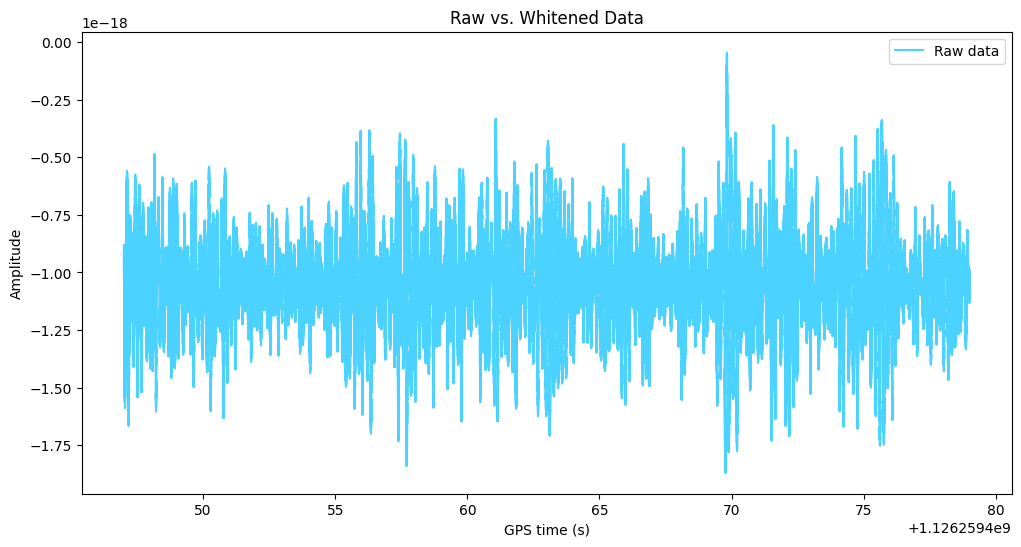

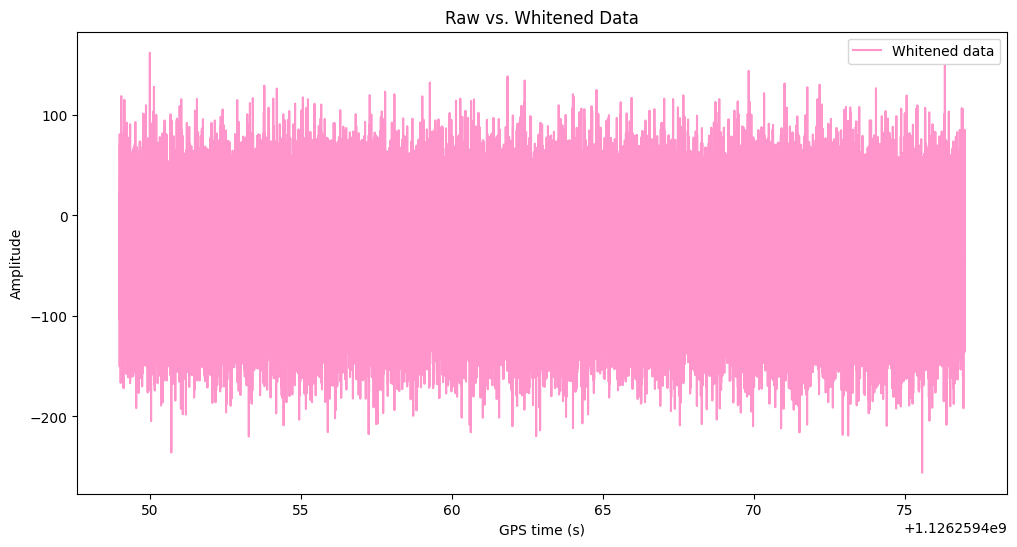

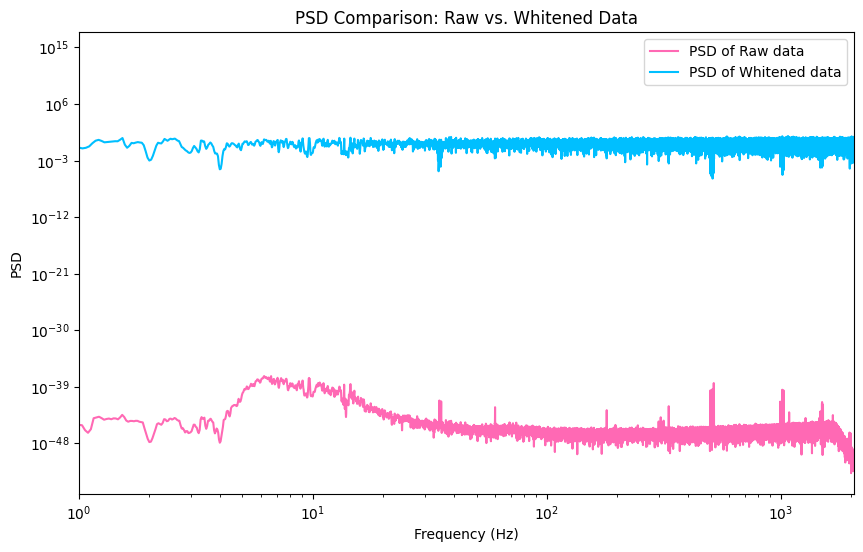

In [ ]:
# to whiten the data
whitened_data = data.whiten(4, 4)


# here I plot the raw detector noise
plt.figure(figsize=(12, 6))
plt.plot(data.sample_times, data, label='Raw data', color='deepskyblue', alpha=0.7)
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude')
plt.title('Raw vs. Whitened Data')
plt.legend()
plt.show()

# plot for the whitened data
plt.figure(figsize=(12, 6))
plt.plot(whitened_data.sample_times, whitened_data, label='Whitened data', color='hotpink', alpha=0.7)
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude')
plt.title('Raw vs. Whitened Data')
plt.legend()
plt.show()

# to estimate the PSD of the whitened data
psd_whitened = whitened_data.filter_psd(whitened_data.duration, whitened_data.delta_f, 1)


# plot the PSDs of the raw and whitened data
plt.figure(figsize=(10, 6))
plt.loglog(psd.sample_frequencies, psd, label='PSD of Raw data', color='hotpink')
plt.loglog(psd_whitened.sample_frequencies, psd_whitened, label='PSD of Whitened data', color='deepskyblue')
plt.xlim(fmin, fnyq)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('PSD Comparison: Raw vs. Whitened Data')
plt.legend()
plt.show()


Now all frequency contributions are at the same level, as we can see from the PSD. However, GW150914 is still hidden in the data.


**Exercise 4:** We can apply a [low pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.lowpass_fir) and a [high pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.highpass_fir) to limit the frequency of the data. The low pass filters above 250 Hz (order=512) and the high pass filters below 30 Hz (order=512).

- Estimate the PSD of the bandpassed data and plot it together with the raw PSD and the whitened PSD. What is the bandpass doing?

- Plot the bandpassed data [cropping](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.crop) 12s on the left and 13s on the right. What can you see? Compare this to the raw data. What frequencies dominate in each case?

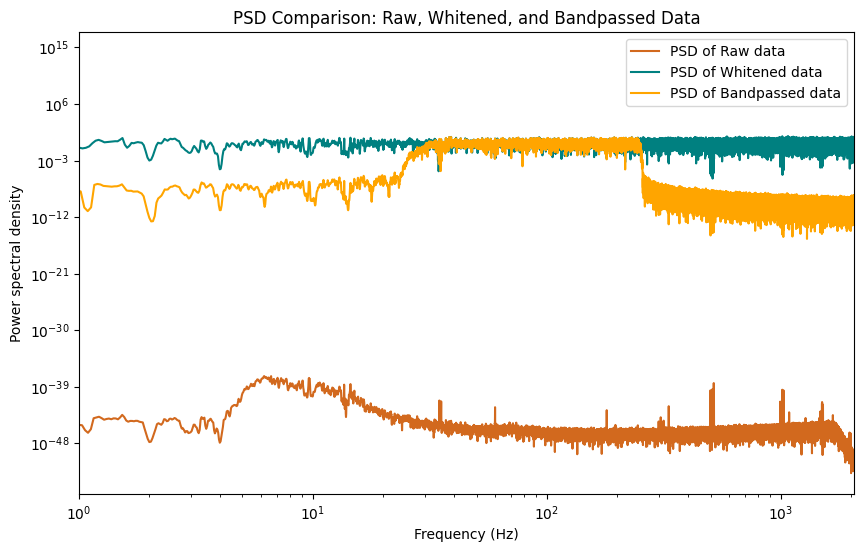

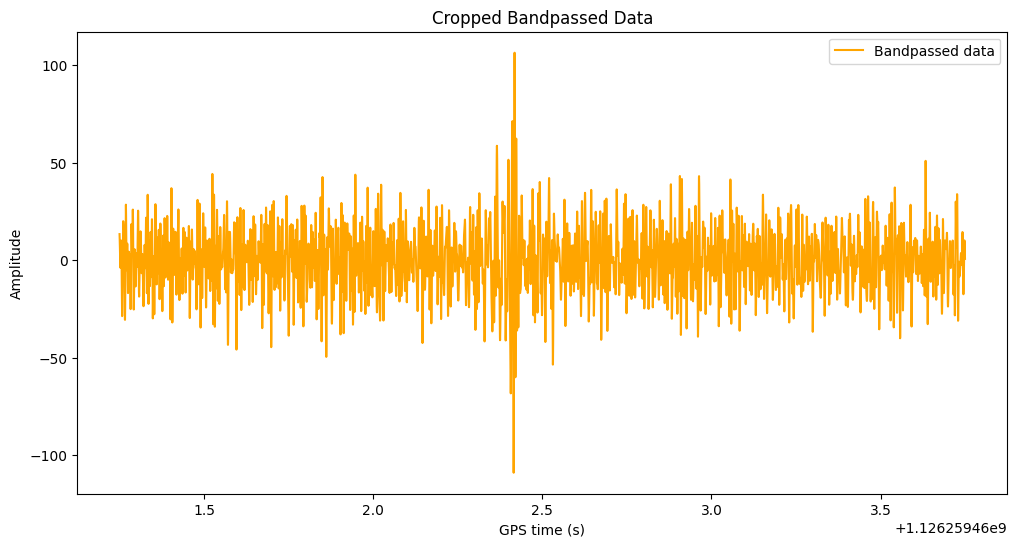

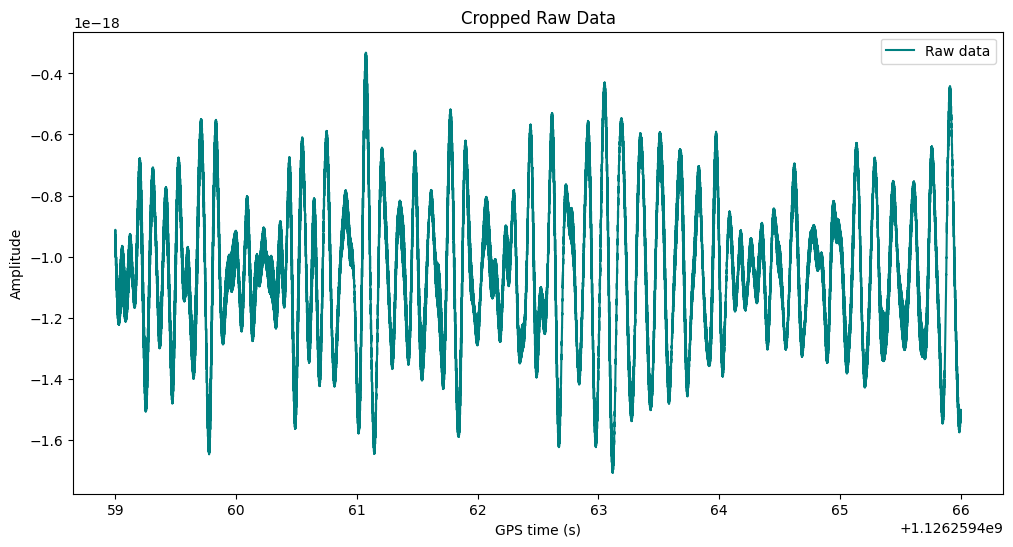

In [ ]:
# low-pass and high-pass filters
low_pass_data = whitened_data.lowpass_fir(250, 512)
high_pass_data = low_pass_data.highpass_fir(30, 512)

# the PSD of the bandpassed data
psd_bandpassed = high_pass_data.filter_psd(high_pass_data.duration, high_pass_data.delta_f, 1)

# plot
plt.figure(figsize=(10, 6))
plt.loglog(psd.sample_frequencies, psd, label='PSD of Raw data', color='chocolate')
plt.loglog(psd_whitened.sample_frequencies, psd_whitened, label='PSD of Whitened data', color='teal')
plt.loglog(psd_bandpassed.sample_frequencies, psd_bandpassed, label='PSD of Bandpassed data', color='orange')
plt.xlim(fmin, fnyq)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density')
plt.title('PSD Comparison: Raw, Whitened, and Bandpassed Data')
plt.legend()
plt.show()

# here is the crop bandpassed data and its plot
cropped_bandpassed_data = high_pass_data.crop(12, 13)
plt.figure(figsize=(12, 6))
plt.plot(cropped_bandpassed_data.sample_times, cropped_bandpassed_data, label='Bandpassed data', color='orange')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude')
plt.title('Cropped Bandpassed Data')
plt.legend()
plt.show()

# lastly, I plot the raw data cropped, same time
cropped_raw_data = data.crop(12, 13)
plt.figure(figsize=(12, 6))
plt.plot(cropped_raw_data.sample_times, cropped_raw_data, label='Raw data', color='teal')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude')
plt.title('Cropped Raw Data')
plt.legend()
plt.show()


**Exercise 5:** Last but not least, we generate a spectrogram (time-frequency representation) using [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.qtransform) function.

_Hint_: logfsteps=200, qrange=(110, 110), frange=(20, 512), vmax=3.5 as it is standard

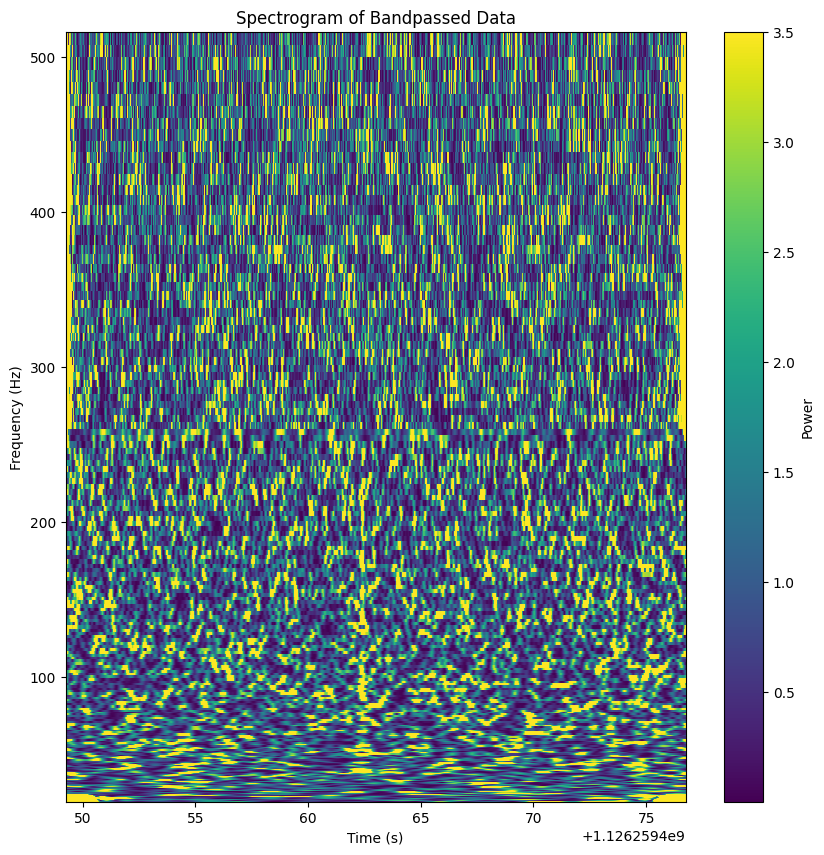

In [ ]:
# spectrogram and its plot, done with the help of Sandro Kiria
times, freqs, power = high_pass_data.qtransform(logfsteps=200, qrange=(110, 110), frange=(20, 512))

plt.figure(figsize=[10, 10])
plt.pcolormesh(times, freqs, power, vmax=3.5, cmap = 'viridis')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of Bandpassed Data")
plt.colorbar(label='Power')
plt.show()


As we have seen, the detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design. Let's see how the detectors will improve in the next observing runs.

**Bonus track:** From the `sensitivity_curves` folder [load](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.read.from_txt) the PSD s:

- Third observing run of H1: `aligo_O3actual_H1.txt`
- Third observing run of L1: `aligo_O3actual_L1.txt`
- Third observing run of V1: `avirgo_O3actual.txt`
- Simulated fourth observing run of LIGO: `aligo_O4high.txt`

Note that these PSDs are from [LIGO public website](https://dcc.ligo.org/ligo-t2000012/public). Also read the PSD of [Einstein Telescope](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.EinsteinTelescopeP1600143) (ET) and [Cosmic Explorer](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.CosmicExplorerP1600143) (CE)

Plot all these PSDs. What can you say about ET and CE improvements?

_Hint_: Minimum frequency is 10 Hz, sampling rate 8192 Hz and duration is 16s.


In [ ]:
import os
print(os.getcwd())

/content


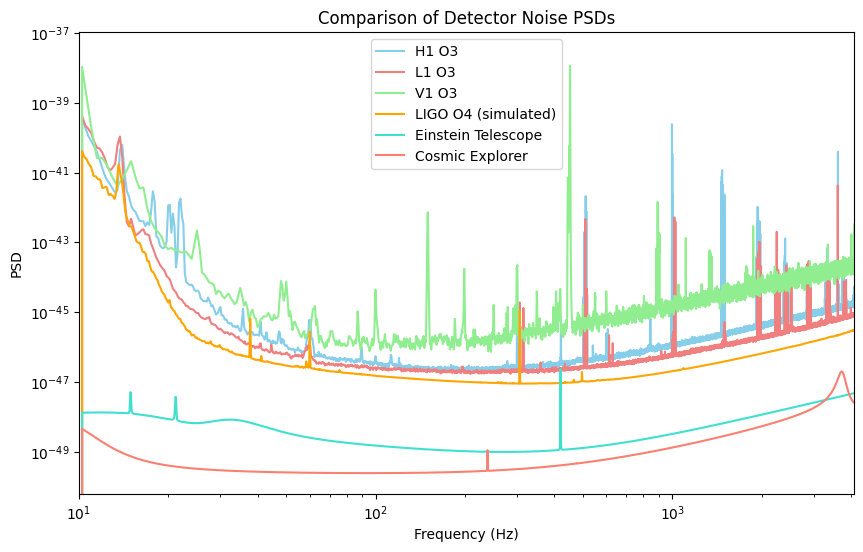

In [ ]:
# The neccesary variables for the analysis are here
fmin = 10.3 # min frequency, reset it to 10.3 by method of trial and error, otherwise it crashes (for aligo_O4high)
delta_f = 1.0 / 16 # from the formula provided above and duration
sampling_rate = 8192
duration = 16
flen = int(sampling_rate * duration)
frequencies = np.linspace(fmin, sampling_rate / 2, flen)

# using the above stated variables, I upload PSDs from files we were given
psd_h1_o3 = pycbc.psd.read.from_txt("sensitivity_curves/aligo_O3actual_H1.txt", flen, delta_f, fmin)
psd_l1_o3 = pycbc.psd.read.from_txt("sensitivity_curves/aligo_O3actual_L1.txt", flen, delta_f, fmin)
psd_v1_o3 = pycbc.psd.read.from_txt("sensitivity_curves/avirgo_O3actual.txt", flen, delta_f, fmin)
psd_ligo_o4 = pycbc.psd.read.from_txt("sensitivity_curves/aligo_O4high.txt", flen, delta_f, fmin)


# the functions provided to generate data for ET and CE
psd_et = pycbc.psd.analytical.EinsteinTelescopeP1600143(flen, delta_f, fmin)
psd_ce = pycbc.psd.analytical.CosmicExplorerP1600143(flen, delta_f, fmin)

# lastly, all this data on the same plot
plt.figure(figsize=(10, 6))
plt.loglog(psd_h1_o3.sample_frequencies, psd_h1_o3, label='H1 O3', color='skyblue')
plt.loglog(psd_l1_o3.sample_frequencies, psd_l1_o3, label='L1 O3', color='lightcoral')
plt.loglog(psd_v1_o3.sample_frequencies, psd_v1_o3, label='V1 O3', color='lightgreen')
plt.loglog(psd_ligo_o4.sample_frequencies, psd_ligo_o4, label='LIGO O4 (simulated)', color='orange')
plt.loglog(psd_et.sample_frequencies, psd_et, label='Einstein Telescope', color='turquoise')
plt.loglog(psd_ce.sample_frequencies, psd_ce, label='Cosmic Explorer', color='salmon')

plt.xlim(10, 8192/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Comparison of Detector Noise PSDs')
plt.legend()
plt.show()


Good job! This is the end of the second part. Maybe you can go for a break?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
